In [18]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import hjb_modified
from numba import njit

Equation with damage function $j$:

\begin{align}
0 = \max_e \min_{h_2} &-\delta \phi(y,z_2) + \delta\eta\log e  + \frac{\partial \phi}{\partial y}(y, z_2) z_2 e\\
&+ \left[\frac{\partial \phi}{\partial z_2}(y, z_2)\right]\left[-\rho(z_2 -  \mu_{2}) \right] + \left[\frac{\partial^2 \phi}{\partial (z_2)^2}(y, z_2)\right]\left(\frac{z_2|\sigma_2|^2}{2}\right)\\
& + (\eta-1)\left(\frac{d}{d \tau}\Lambda_j(y)z_2 e\right)\\
\end{align}

where

\begin{equation}
\Lambda_j(\tau)=
\begin{cases}
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2, & \tau\leq \bar{\tau} \\
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2 + \frac{\lambda_{2,j}^+}{2}(\tau-\bar{\tau})^2, & \tau > \bar{\tau}
\end{cases}
\end{equation}

FOC of $e$ gives :

$$
e^* = -\frac{\delta \eta}{\frac{\partial \phi}{\partial y}(y, z_2)z_2 + (\eta-1)\frac{d}{d \tau}\Lambda_j(y)z_2}
$$

In [3]:
# Model parameters
η = .032
δ = .01
# Z process
μ_2 = 1.86/1000.
ρ = 0.9
σ_2 = np.sqrt(2*ρ/10416.29)
# Damage setting
λ_1 = 1.7675/10000
λ_2 = 0.0022*2
λ_bar = 2.
# Three damages
# λ_2p_state = np.array([0., 0.0197*2, 0.3853*2])
# λ_2p_prior = np.array([0.4875, 0.4875, 0.025])
# Two damages
λ_2p_state = np.array([0., 0.0197*2])

# Capital and z parameters
α_k = -0.043
β_k = 0.04
σ_k = np.array([0.477*2, 0])/100.
β_z = 0.014*4
σ_z = np.array([0.011*2, 0.025*2])
α = 0.115
ioverk = 0.09
κ = 6.667

In [5]:
# Grid setting
n_z = 50
z_min = np.max([μ_2 - 3*np.sqrt(σ_2**2*μ_2/(2*ρ)), 1e-9])
z_max = μ_2 + 3*np.sqrt(σ_2**2*μ_2/(2*ρ))
z_grid = np.linspace(z_min, z_max, n_z)

n_y = 50
y_min = 1e-10
y_max = 10
y_grid = np.linspace(y_min, y_max, n_y)

# Solve for each damage function
ϕ_state = []
for λ_2p in λ_2p_state:
    pde_paras = (η, δ, η, μ_2, ρ, σ_2, λ_1, λ_2, λ_bar, λ_2p)
    ϕ, _ = hjb_modified(z_grid, y_grid, model_paras=pde_paras, v0=None,
                           ϵ=.5, tol=1e-8, max_iter=10_000, use_python=False)
    ϕ_state.append(ϕ)

Iteration 1: LHS Error: 0.0014451636931549635; RHS Error 0.0018258099200731185
Iteration 2: LHS Error: 0.0013259298265649209; RHS Error 0.0015870481258874083
Iteration 3: LHS Error: 0.0012489890928941943; RHS Error 0.0014341936562414616
Iteration 4: LHS Error: 0.0011924643904215274; RHS Error 0.0013256548324169116
Iteration 5: LHS Error: 0.0011464755682885977; RHS Error 0.0012433684624314108
Iteration 6: LHS Error: 0.0011067084717271735; RHS Error 0.0011782676056142274
Iteration 7: LHS Error: 0.0010714123281512257; RHS Error 0.001125323000374886
Iteration 8: LHS Error: 0.0010398559227960246; RHS Error 0.0010814396887144214
Iteration 9: LHS Error: 0.001011608054127408; RHS Error 0.0010445063040953764
Iteration 10: LHS Error: 0.0009862799201139985; RHS Error 0.0010129711800735076
Iteration 11: LHS Error: 0.0009634783799504117; RHS Error 0.0009856532271039168
Iteration 12: LHS Error: 0.0009428251125487702; RHS Error 0.0009616462935188826
Iteration 13: LHS Error: 0.000923979829729981; RHS 

Iteration 106: LHS Error: 0.000376536592990695; RHS Error 0.00037747370085993424
Iteration 107: LHS Error: 0.0003737479977524022; RHS Error 0.0003746720812276156
Iteration 108: LHS Error: 0.0003709858604054872; RHS Error 0.0003718971790635691
Iteration 109: LHS Error: 0.0003682498004889956; RHS Error 0.00036914860959952507
Iteration 110: LHS Error: 0.00036553944769754376; RHS Error 0.0003664259919470873
Iteration 111: LHS Error: 0.0003628544397792782; RHS Error 0.0003637289582328897
Iteration 112: LHS Error: 0.0003601944226060555; RHS Error 0.0003610571476126799
Iteration 113: LHS Error: 0.00035755904959919316; RHS Error 0.00035841020945857606
Iteration 114: LHS Error: 0.0003549479823503898; RHS Error 0.00035578779607930554
Iteration 115: LHS Error: 0.0003523608894635405; RHS Error 0.0003531895717556726
Iteration 116: LHS Error: 0.0003497974470190873; RHS Error 0.0003506152051319572
Iteration 117: LHS Error: 0.00034725733788767976; RHS Error 0.00034806437781851154
Iteration 118: LHS Er

Iteration 212: LHS Error: 0.0001811234600793965; RHS Error 0.00018140925126624576
Iteration 213: LHS Error: 0.00017994109795706204; RHS Error 0.00018022420294736214
Iteration 214: LHS Error: 0.00017876725352779232; RHS Error 0.0001790477051751469
Iteration 215: LHS Error: 0.00017760185400894635; RHS Error 0.00017787967759375078
Iteration 216: LHS Error: 0.00017644482754171353; RHS Error 0.00017672005507169417
Iteration 217: LHS Error: 0.00017529610311842192; RHS Error 0.0001755687645065314
Iteration 218: LHS Error: 0.00017415561062578133; RHS Error 0.00017442573687253605
Iteration 219: LHS Error: 0.00017302328267176925; RHS Error 0.00017329090095262077
Iteration 220: LHS Error: 0.00017189904462695804; RHS Error 0.00017216418005528084
Iteration 221: LHS Error: 0.0001707828328218891; RHS Error 0.00017104552033987773
Iteration 222: LHS Error: 0.00016967457858296786; RHS Error 0.00016993483967805512
Iteration 223: LHS Error: 0.00016857421617254287; RHS Error 0.00016883208119758994
Iteratio

Iteration 319: LHS Error: 9.167112690873502e-05; RHS Error 9.178466614432159e-05
Iteration 320: LHS Error: 9.110307454171518e-05; RHS Error 9.12157097449726e-05
Iteration 321: LHS Error: 9.053873883052566e-05; RHS Error 9.065047861780398e-05
Iteration 322: LHS Error: 8.99780942344025e-05; RHS Error 9.008894522681565e-05
Iteration 323: LHS Error: 8.942111419764365e-05; RHS Error 8.953108607055184e-05
Iteration 324: LHS Error: 8.886777177281868e-05; RHS Error 8.897686970266887e-05
Iteration 325: LHS Error: 8.831804129764975e-05; RHS Error 8.842627353103307e-05
Iteration 326: LHS Error: 8.777189800819596e-05; RHS Error 8.787927225340517e-05
Iteration 327: LHS Error: 8.722931569678238e-05; RHS Error 8.733584180286213e-05
Iteration 328: LHS Error: 8.669026920726797e-05; RHS Error 8.67959558929056e-05
Iteration 329: LHS Error: 8.615473342939162e-05; RHS Error 8.625958471602071e-05
Iteration 330: LHS Error: 8.562268359089964e-05; RHS Error 8.572670787623771e-05
Iteration 331: LHS Error: 8.509

Iteration 427: LHS Error: 4.734653063488692e-05; RHS Error 4.739640962361162e-05
Iteration 428: LHS Error: 4.70617400914336e-05; RHS Error 4.711125511825331e-05
Iteration 429: LHS Error: 4.67787239302464e-05; RHS Error 4.682788142129494e-05
Iteration 430: LHS Error: 4.649747063671661e-05; RHS Error 4.654626851850405e-05
Iteration 431: LHS Error: 4.621796863538141e-05; RHS Error 4.626641226211756e-05
Iteration 432: LHS Error: 4.5940206435057807e-05; RHS Error 4.598830035811583e-05
Iteration 433: LHS Error: 4.56641725438689e-05; RHS Error 4.57119182304456e-05
Iteration 434: LHS Error: 4.538985573512844e-05; RHS Error 4.543725349556412e-05
Iteration 435: LHS Error: 4.511724479808188e-05; RHS Error 4.516429971763774e-05
Iteration 436: LHS Error: 4.484632848035519e-05; RHS Error 4.489304518744575e-05
Iteration 437: LHS Error: 4.457709572151802e-05; RHS Error 4.462347502214991e-05
Iteration 438: LHS Error: 4.4309535387435095e-05; RHS Error 4.4355579068783854e-05
Iteration 439: LHS Error: 4.4

Iteration 528: LHS Error: 2.589414205597662e-05; RHS Error 2.5918633351060174e-05
Iteration 529: LHS Error: 2.5741235862741796e-05; RHS Error 2.5765557093568726e-05
Iteration 530: LHS Error: 2.55892559693216e-05; RHS Error 2.5613411767836367e-05
Iteration 531: LHS Error: 2.5438196524105172e-05; RHS Error 2.5462186354634816e-05
Iteration 532: LHS Error: 2.528805176066351e-05; RHS Error 2.5311877936845376e-05
Iteration 533: LHS Error: 2.513881584025046e-05; RHS Error 2.516247855658977e-05
Iteration 534: LHS Error: 2.4990490904458484e-05; RHS Error 2.5013982492845272e-05
Iteration 535: LHS Error: 2.484305499203532e-05; RHS Error 2.4866381951986764e-05
Iteration 536: LHS Error: 2.4696511877933536e-05; RHS Error 2.4719689012135736e-05
Iteration 537: LHS Error: 2.455085600491791e-05; RHS Error 2.457388096660984e-05
Iteration 538: LHS Error: 2.4406082390057704e-05; RHS Error 2.442895202080708e-05
Iteration 539: LHS Error: 2.4262182118123254e-05; RHS Error 2.4284896725986827e-05
Iteration 540:

Iteration 637: LHS Error: 1.3643627182272078e-05; RHS Error 1.3655390030881836e-05
Iteration 638: LHS Error: 1.3564206251398536e-05; RHS Error 1.357589150129796e-05
Iteration 639: LHS Error: 1.3485256491654884e-05; RHS Error 1.3496865426673244e-05
Iteration 640: LHS Error: 1.3406775014213057e-05; RHS Error 1.341830766686937e-05
Iteration 641: LHS Error: 1.3328758980510336e-05; RHS Error 1.3340215124705299e-05
Iteration 642: LHS Error: 1.3251205569428381e-05; RHS Error 1.3262586361639794e-05
Iteration 643: LHS Error: 1.3174111957670043e-05; RHS Error 1.3185417816747539e-05
Iteration 644: LHS Error: 1.3097475333900821e-05; RHS Error 1.3108707532649721e-05
Iteration 645: LHS Error: 1.3021292920606387e-05; RHS Error 1.3032450746628017e-05
Iteration 646: LHS Error: 1.2945561963212393e-05; RHS Error 1.2956647241748427e-05
Iteration 647: LHS Error: 1.2870279698082299e-05; RHS Error 1.2881291879654629e-05
Iteration 648: LHS Error: 1.2795443416813157e-05; RHS Error 1.2806382915751054e-05
Iterat

Iteration 740: LHS Error: 7.501450172725521e-06; RHS Error 7.507471403751993e-06
Iteration 741: LHS Error: 7.458223706235945e-06; RHS Error 7.464207238369255e-06
Iteration 742: LHS Error: 7.415250004152996e-06; RHS Error 7.4211954991867946e-06
Iteration 743: LHS Error: 7.372527585314259e-06; RHS Error 7.378434351605514e-06
Iteration 744: LHS Error: 7.330054956053433e-06; RHS Error 7.335923935214168e-06
Iteration 745: LHS Error: 7.287830627741854e-06; RHS Error 7.293661790596512e-06
Iteration 746: LHS Error: 7.245853111820244e-06; RHS Error 7.25164750140124e-06
Iteration 747: LHS Error: 7.204120934425906e-06; RHS Error 7.209878923883535e-06
Iteration 748: LHS Error: 7.16263261235639e-06; RHS Error 7.168354613920581e-06
Iteration 749: LHS Error: 7.121386711134159e-06; RHS Error 7.127070736322942e-06
Iteration 750: LHS Error: 7.080381805454894e-06; RHS Error 7.086030334447092e-06
Iteration 751: LHS Error: 7.039616428117235e-06; RHS Error 7.045228492633462e-06
Iteration 752: LHS Error: 6.9

Iteration 842: LHS Error: 4.170356881549875e-06; RHS Error 6.205982218684004e-06
Iteration 843: LHS Error: 4.14651241419095e-06; RHS Error 6.229503856041048e-06
Iteration 844: LHS Error: 4.122805929360207e-06; RHS Error 6.252887809489764e-06
Iteration 845: LHS Error: 4.09923655754485e-06; RHS Error 6.276137461446243e-06
Iteration 846: LHS Error: 4.0758034909604834e-06; RHS Error 6.299252504177481e-06
Iteration 847: LHS Error: 4.0525059832874355e-06; RHS Error 6.322234553200658e-06
Iteration 848: LHS Error: 4.0293431744498065e-06; RHS Error 6.345082937567886e-06
Iteration 849: LHS Error: 4.0063142708601784e-06; RHS Error 6.367800326807392e-06
Iteration 850: LHS Error: 3.983418531944283e-06; RHS Error 6.390386164697873e-06
Iteration 851: LHS Error: 3.960655222109977e-06; RHS Error 6.412841849455075e-06
Iteration 852: LHS Error: 3.938023458910367e-06; RHS Error 6.4351671906777e-06
Iteration 853: LHS Error: 3.915522492820012e-06; RHS Error 6.45736403703215e-06
Iteration 854: LHS Error: 3.8

Iteration 951: LHS Error: 2.2369468514332747e-06; RHS Error 8.113680167483664e-06
Iteration 952: LHS Error: 2.2242388306309424e-06; RHS Error 8.126223673935503e-06
Iteration 953: LHS Error: 2.2116037997343962e-06; RHS Error 8.138695246977593e-06
Iteration 954: LHS Error: 2.199041325853801e-06; RHS Error 8.15109531541341e-06
Iteration 955: LHS Error: 2.1865509548524287e-06; RHS Error 8.163424288457066e-06
Iteration 956: LHS Error: 2.1741323330548568e-06; RHS Error 8.175682314580943e-06
Iteration 957: LHS Error: 2.1617849463306804e-06; RHS Error 8.18787062451822e-06
Iteration 958: LHS Error: 2.1495084348566174e-06; RHS Error 8.199988608466975e-06
Iteration 959: LHS Error: 2.1373023695175908e-06; RHS Error 8.212037370433417e-06
Iteration 960: LHS Error: 2.1251663264026943e-06; RHS Error 8.224017156136139e-06
Iteration 961: LHS Error: 2.1130998944796087e-06; RHS Error 8.235928325801313e-06
Iteration 962: LHS Error: 2.101102663201737e-06; RHS Error 8.247771286422172e-06
Iteration 963: LHS E

Iteration 1064: LHS Error: 1.1772624552292e-06; RHS Error 9.159967887064887e-06
Iteration 1065: LHS Error: 1.1706131349403792e-06; RHS Error 9.166535765899216e-06
Iteration 1066: LHS Error: 1.1640015192132536e-06; RHS Error 9.173066629946693e-06
Iteration 1067: LHS Error: 1.1574273896391984e-06; RHS Error 9.17956056648646e-06
Iteration 1068: LHS Error: 1.1508905328749819e-06; RHS Error 9.18601774407184e-06
Iteration 1069: LHS Error: 1.1443907343838822e-06; RHS Error 9.192438370257293e-06
Iteration 1070: LHS Error: 1.1379277797818332e-06; RHS Error 9.198822623350924e-06
Iteration 1071: LHS Error: 1.131501455406414e-06; RHS Error 9.205170724054445e-06
Iteration 1072: LHS Error: 1.125111549774016e-06; RHS Error 9.211482875284751e-06
Iteration 1073: LHS Error: 1.1187578546484334e-06; RHS Error 9.217759276690298e-06
Iteration 1074: LHS Error: 1.112440161515904e-06; RHS Error 9.224000126311456e-06
Iteration 1075: LHS Error: 1.1061582673582704e-06; RHS Error 9.230205629285997e-06
Iteration 10

Iteration 1170: LHS Error: 6.464850714898995e-07; RHS Error 9.684312708122022e-06
Iteration 1171: LHS Error: 6.428466367419672e-07; RHS Error 9.687907756592094e-06
Iteration 1172: LHS Error: 6.392287954098963e-07; RHS Error 9.69148248637793e-06
Iteration 1173: LHS Error: 6.356314299904575e-07; RHS Error 9.69503698319634e-06
Iteration 1174: LHS Error: 6.320544245069781e-07; RHS Error 9.698571381550839e-06
Iteration 1175: LHS Error: 6.284976625664518e-07; RHS Error 9.702085793858884e-06
Iteration 1176: LHS Error: 6.250479454295021e-07; RHS Error 9.705580398825615e-06
Iteration 1177: LHS Error: 6.214479622151936e-07; RHS Error 9.709045215114094e-06
Iteration 1178: LHS Error: 6.179494599634072e-07; RHS Error 9.712505585695967e-06
Iteration 1179: LHS Error: 6.145440744620423e-07; RHS Error 9.715944881083733e-06
Iteration 1180: LHS Error: 6.110182675239662e-07; RHS Error 9.719352743762632e-06
Iteration 1181: LHS Error: 6.076333353144392e-07; RHS Error 9.722754079601699e-06
Iteration 1182: LH

Iteration 1280: LHS Error: 3.478379146520938e-07; RHS Error 9.979436100784628e-06
Iteration 1281: LHS Error: 3.458867821187761e-07; RHS Error 9.981365161027987e-06
Iteration 1282: LHS Error: 3.439465443844103e-07; RHS Error 9.98328346499917e-06
Iteration 1283: LHS Error: 3.420171404283634e-07; RHS Error 9.985191064967999e-06
Iteration 1284: LHS Error: 3.40098511478204e-07; RHS Error 9.987088001505969e-06
Iteration 1285: LHS Error: 3.3819059885864533e-07; RHS Error 9.988974340369942e-06
Iteration 1286: LHS Error: 3.3629334593443527e-07; RHS Error 9.99085012622948e-06
Iteration 1287: LHS Error: 3.344066961813441e-07; RHS Error 9.992715409855822e-06
Iteration 1288: LHS Error: 3.3253059472659885e-07; RHS Error 9.994570253153657e-06
Iteration 1289: LHS Error: 3.306649862394595e-07; RHS Error 9.996414693577834e-06
Iteration 1290: LHS Error: 3.28809817096154e-07; RHS Error 9.998248799501829e-06
Iteration 1291: LHS Error: 3.269650317300199e-07; RHS Error 1.0000072613819064e-05
Iteration 1292: 

Iteration 1383: LHS Error: 1.949444910914755e-07; RHS Error 1.0130583205899277e-05
Iteration 1384: LHS Error: 1.9384890470597327e-07; RHS Error 1.0131663652879208e-05
Iteration 1385: LHS Error: 1.9276264971723744e-07; RHS Error 1.013273713309842e-05
Iteration 1386: LHS Error: 1.9168256380763804e-07; RHS Error 1.0133804555070196e-05
Iteration 1387: LHS Error: 1.9060858495734134e-07; RHS Error 1.0134866071059671e-05
Iteration 1388: LHS Error: 1.8954064315290786e-07; RHS Error 1.0135921687833352e-05
Iteration 1389: LHS Error: 1.8847870200677797e-07; RHS Error 1.0136971418480594e-05
Iteration 1390: LHS Error: 1.8742272614447053e-07; RHS Error 1.0138015267251903e-05
Iteration 1391: LHS Error: 1.8637268482668556e-07; RHS Error 1.0139053265077833e-05
Iteration 1392: LHS Error: 1.8532854764718998e-07; RHS Error 1.0140085437302911e-05
Iteration 1393: LHS Error: 1.8429028425526184e-07; RHS Error 1.0141111807178069e-05
Iteration 1394: LHS Error: 1.832578622601444e-07; RHS Error 1.014213241145364e

Iteration 1494: LHS Error: 1.0456739119035774e-07; RHS Error 1.0220035265723739e-05
Iteration 1495: LHS Error: 1.039750233688963e-07; RHS Error 1.02206169463534e-05
Iteration 1496: LHS Error: 1.0338657797925865e-07; RHS Error 1.0221194906169257e-05
Iteration 1497: LHS Error: 1.0280200539447559e-07; RHS Error 1.0221769220416675e-05
Iteration 1498: LHS Error: 1.0222124945113986e-07; RHS Error 1.0222339944610274e-05
Iteration 1499: LHS Error: 1.0164425572056768e-07; RHS Error 1.0222907141703604e-05
Iteration 1500: LHS Error: 1.0107096869160781e-07; RHS Error 1.0223470863361716e-05
Iteration 1501: LHS Error: 1.0050133450456578e-07; RHS Error 1.0224031173937647e-05
Iteration 1502: LHS Error: 9.993530204754908e-08; RHS Error 1.022458811021274e-05
Iteration 1503: LHS Error: 9.937282073602116e-08; RHS Error 1.0225141715089741e-05
Iteration 1504: LHS Error: 9.881384295529205e-08; RHS Error 1.0225692026707197e-05
Iteration 1505: LHS Error: 9.825832200660578e-08; RHS Error 1.022623908770808e-05
I

Iteration 1612: LHS Error: 5.39075550587409e-08; RHS Error 1.0270057084130332e-05
Iteration 1613: LHS Error: 5.360980658009051e-08; RHS Error 1.0270360406500808e-05
Iteration 1614: LHS Error: 5.3304806277298944e-08; RHS Error 1.0270658241002444e-05
Iteration 1615: LHS Error: 5.300587421763758e-08; RHS Error 1.0270954237812406e-05
Iteration 1616: LHS Error: 5.270832775794432e-08; RHS Error 1.027124649080266e-05
Iteration 1617: LHS Error: 5.241329441296738e-08; RHS Error 1.0271537479611447e-05
Iteration 1618: LHS Error: 5.242571525509998e-08; RHS Error 1.0271826290798002e-05
Iteration 1619: LHS Error: 5.196235128290816e-08; RHS Error 1.027220062658628e-05
Iteration 1620: LHS Error: 5.1562036848529225e-08; RHS Error 1.0272555207963994e-05
Iteration 1621: LHS Error: 5.121894275372796e-08; RHS Error 1.0272882116968418e-05
Iteration 1622: LHS Error: 5.091454101380233e-08; RHS Error 1.0273187020509635e-05
Iteration 1623: LHS Error: 5.0618778488220606e-08; RHS Error 1.027347746053453e-05
Itera

Iteration 1719: LHS Error: 2.9570983731130873e-08; RHS Error 1.029419152761093e-05
Iteration 1720: LHS Error: 2.9405411272609427e-08; RHS Error 1.0294354787889924e-05
Iteration 1721: LHS Error: 2.924074334054172e-08; RHS Error 1.0294517150007381e-05
Iteration 1722: LHS Error: 2.9076979130016056e-08; RHS Error 1.0294678624604746e-05
Iteration 1723: LHS Error: 2.891411388095122e-08; RHS Error 1.0294839195013278e-05
Iteration 1724: LHS Error: 2.875214170916518e-08; RHS Error 1.0294998888997877e-05
Iteration 1725: LHS Error: 2.859105979746701e-08; RHS Error 1.029515770225079e-05
Iteration 1726: LHS Error: 2.843086316373089e-08; RHS Error 1.0295315640413772e-05
Iteration 1727: LHS Error: 2.827154957363298e-08; RHS Error 1.029547270109247e-05
Iteration 1728: LHS Error: 2.811310766126507e-08; RHS Error 1.0295628889640893e-05
Iteration 1729: LHS Error: 2.795554276957546e-08; RHS Error 1.0295784225997301e-05
Iteration 1730: LHS Error: 2.7798843879600632e-08; RHS Error 1.0295938696423552e-05
Ite

Iteration 1828: LHS Error: 1.6009125886062847e-08; RHS Error 1.0307569796039976e-05
Iteration 1829: LHS Error: 1.5918844159523715e-08; RHS Error 1.0307655852491654e-05
Iteration 1830: LHS Error: 1.5828000840545364e-08; RHS Error 1.0307743534373809e-05
Iteration 1831: LHS Error: 1.5738782929708428e-08; RHS Error 1.0307832821456744e-05
Iteration 1832: LHS Error: 1.5650007109679898e-08; RHS Error 1.030792188955903e-05
Iteration 1833: LHS Error: 1.5561767832683593e-08; RHS Error 1.0308007936987761e-05
Iteration 1834: LHS Error: 1.5474244829949413e-08; RHS Error 1.0308093303522566e-05
Iteration 1835: LHS Error: 1.5387831994728707e-08; RHS Error 1.0308178656442393e-05
Iteration 1836: LHS Error: 1.5300905417681143e-08; RHS Error 1.0308264576347481e-05
Iteration 1837: LHS Error: 1.5215495377529642e-08; RHS Error 1.030835026287957e-05
Iteration 1838: LHS Error: 1.5129674263425485e-08; RHS Error 1.030843420553925e-05
Iteration 1839: LHS Error: 1.5044694823274085e-08; RHS Error 1.0308517018627669

Iteration 19: LHS Error: 0.0008356790262634035; RHS Error 0.0008445777257701678
Iteration 20: LHS Error: 0.0008236988651583524; RHS Error 0.0008319795245607834
Iteration 21: LHS Error: 0.0008122515123953865; RHS Error 0.0008199974435444217
Iteration 22: LHS Error: 0.0008012790198556712; RHS Error 0.0008085576731760482
Iteration 23: LHS Error: 0.0007907327975389053; RHS Error 0.000797599516099531
Iteration 24: LHS Error: 0.0007805717329119437; RHS Error 0.0007870724876884778
Iteration 25: LHS Error: 0.0007707607185368434; RHS Error 0.0007769341336530703
Iteration 26: LHS Error: 0.0007612695061096457; RHS Error 0.0007671483746654373
Iteration 27: LHS Error: 0.0007520718531023804; RHS Error 0.0007576842838036351
Iteration 28: LHS Error: 0.0007431448088102699; RHS Error 0.0007485150877449913
Iteration 29: LHS Error: 0.0007344681488197918; RHS Error 0.0007396174393131765
Iteration 30: LHS Error: 0.000726023985397152; RHS Error 0.0007309708470926209
Iteration 31: LHS Error: 0.000717796361117

Iteration 123: LHS Error: 0.0003000013196147455; RHS Error 0.0003012510267389935
Iteration 124: LHS Error: 0.00029728457200935143; RHS Error 0.0002985223644320138
Iteration 125: LHS Error: 0.00029459293055555946; RHS Error 0.000295818933755729
Iteration 126: LHS Error: 0.00029192615195819394; RHS Error 0.000293140486004607
Iteration 127: LHS Error: 0.0002892839948515913; RHS Error 0.000290486784046196
Iteration 128: LHS Error: 0.0002866662194856151; RHS Error 0.0002878575820865355
Iteration 129: LHS Error: 0.0002840725902760466; RHS Error 0.0002852526449527831
Iteration 130: LHS Error: 0.0002815028736486008; RHS Error 0.0002826717375579088
Iteration 131: LHS Error: 0.0002789568381909163; RHS Error 0.0002801146217313715
Iteration 132: LHS Error: 0.0002764342548569193; RHS Error 0.0002775810774627513
Iteration 133: LHS Error: 0.00027393489719540476; RHS Error 0.00027507087395019475
Iteration 134: LHS Error: 0.0002714585414926446; RHS Error 0.0002725837781156463
Iteration 135: LHS Error: 

Iteration 224: LHS Error: 0.00016637109014039364; RHS Error 0.00017182016255955332
Iteration 225: LHS Error: 0.00016554866434410898; RHS Error 0.00017099776365946015
Iteration 226: LHS Error: 0.00016473030475575023; RHS Error 0.00017017943180172194
Iteration 227: LHS Error: 0.00016391599009621394; RHS Error 0.00016936514457901346
Iteration 228: LHS Error: 0.00016310570040371786; RHS Error 0.00016855488162022828
Iteration 229: LHS Error: 0.00016229941491831268; RHS Error 0.00016774862304481727
Iteration 230: LHS Error: 0.0001614971165020268; RHS Error 0.0001669463500502586
Iteration 231: LHS Error: 0.000160698781496188; RHS Error 0.00016614804106171753
Iteration 232: LHS Error: 0.00015990439388122168; RHS Error 0.00016535367883661293
Iteration 233: LHS Error: 0.00015911392873070584; RHS Error 0.00016456324160961578
Iteration 234: LHS Error: 0.00015832737364583627; RHS Error 0.00016377671541888914
Iteration 235: LHS Error: 0.00015754470933188047; RHS Error 0.0001629940758297759
Iteration

Iteration 329: LHS Error: 9.887612200697171e-05; RHS Error 0.00010432736811285695
Iteration 330: LHS Error: 9.838731310508886e-05; RHS Error 0.0001038385744815379
Iteration 331: LHS Error: 9.790092025029062e-05; RHS Error 0.00010335219754652332
Iteration 332: LHS Error: 9.741693184521505e-05; RHS Error 0.00010286822465633567
Iteration 333: LHS Error: 9.693533516001718e-05; RHS Error 0.00010238664478653549
Iteration 334: LHS Error: 9.645611981284885e-05; RHS Error 0.00010190744440919888
Iteration 335: LHS Error: 9.59792725101355e-05; RHS Error 0.00010143061362703637
Iteration 336: LHS Error: 9.550478280050123e-05; RHS Error 0.00010095613873555358
Iteration 337: LHS Error: 9.503263847206178e-05; RHS Error 0.0001004840098274111
Iteration 338: LHS Error: 9.45628262131043e-05; RHS Error 0.0001000142147754954
Iteration 339: LHS Error: 9.409534017590371e-05; RHS Error 9.954674463893013e-05
Iteration 340: LHS Error: 9.363016135205404e-05; RHS Error 9.908157931826766e-05
Iteration 341: LHS Erro

Iteration 435: LHS Error: 5.847062085127808e-05; RHS Error 6.392316908200964e-05
Iteration 436: LHS Error: 5.818154417010224e-05; RHS Error 6.363410183864556e-05
Iteration 437: LHS Error: 5.789389658815425e-05; RHS Error 6.33464636536031e-05
Iteration 438: LHS Error: 5.760767098823838e-05; RHS Error 6.306024717771171e-05
Iteration 439: LHS Error: 5.732285993324815e-05; RHS Error 6.277544569226366e-05
Iteration 440: LHS Error: 5.7039457424523654e-05; RHS Error 6.249205217165741e-05
Iteration 441: LHS Error: 5.675745524467979e-05; RHS Error 6.221005968477897e-05
Iteration 442: LHS Error: 5.647684751469706e-05; RHS Error 6.19294610088129e-05
Iteration 443: LHS Error: 5.619762686565055e-05; RHS Error 6.165024935311347e-05
Iteration 444: LHS Error: 5.5919786491748225e-05; RHS Error 6.137241803757417e-05
Iteration 445: LHS Error: 5.564331960099256e-05; RHS Error 6.109596025750429e-05
Iteration 446: LHS Error: 5.536821942209169e-05; RHS Error 6.082086913326924e-05
Iteration 447: LHS Error: 5.

Iteration 541: LHS Error: 3.457562190668784e-05; RHS Error 4.002894562648646e-05
Iteration 542: LHS Error: 3.440467063442476e-05; RHS Error 3.9858000528655255e-05
Iteration 543: LHS Error: 3.423456487344767e-05; RHS Error 3.968790024545582e-05
Iteration 544: LHS Error: 3.4065298353133655e-05; RHS Error 3.951864090139394e-05
Iteration 545: LHS Error: 3.3896870715269256e-05; RHS Error 3.935021867423308e-05
Iteration 546: LHS Error: 3.372927735041664e-05; RHS Error 3.918262934870587e-05
Iteration 547: LHS Error: 3.356250994424048e-05; RHS Error 3.9015867525735024e-05
Iteration 548: LHS Error: 3.33965655057028e-05; RHS Error 3.8849930068286743e-05
Iteration 549: LHS Error: 3.3231445607073695e-05; RHS Error 3.8684813930358995e-05
Iteration 550: LHS Error: 3.3067137644046674e-05; RHS Error 3.8520513195233004e-05
Iteration 551: LHS Error: 3.290364443608862e-05; RHS Error 3.8357025319734033e-05
Iteration 552: LHS Error: 3.274096092718837e-05; RHS Error 3.8194345643962095e-05
Iteration 553: LHS

Iteration 643: LHS Error: 2.0854466930064763e-05; RHS Error 2.630810441728079e-05
Iteration 644: LHS Error: 2.075135386192528e-05; RHS Error 2.62049962816004e-05
Iteration 645: LHS Error: 2.064875064519689e-05; RHS Error 2.6102397532511048e-05
Iteration 646: LHS Error: 2.0546654738953785e-05; RHS Error 2.6000305782151073e-05
Iteration 647: LHS Error: 2.0445063619811688e-05; RHS Error 2.58987186092128e-05
Iteration 648: LHS Error: 2.0343974786007912e-05; RHS Error 2.5797633581130198e-05
Iteration 649: LHS Error: 2.0243385738985542e-05; RHS Error 2.5697048236574736e-05
Iteration 650: LHS Error: 2.014329399920023e-05; RHS Error 2.559696014242175e-05
Iteration 651: LHS Error: 2.004369710087439e-05; RHS Error 2.5497366851864916e-05
Iteration 652: LHS Error: 1.9944592592427424e-05; RHS Error 2.5398265924396642e-05
Iteration 653: LHS Error: 1.9845978040111678e-05; RHS Error 2.52996549350144e-05
Iteration 654: LHS Error: 1.9747851034548902e-05; RHS Error 2.5201531469050712e-05
Iteration 655: L

Iteration 744: LHS Error: 1.2640657766099794e-05; RHS Error 1.809469785055373e-05
Iteration 745: LHS Error: 1.2578150365108454e-05; RHS Error 1.8032193118840356e-05
Iteration 746: LHS Error: 1.2515952341335401e-05; RHS Error 1.7969997330338625e-05
Iteration 747: LHS Error: 1.245406214242517e-05; RHS Error 1.790810933754728e-05
Iteration 748: LHS Error: 1.2392478148187669e-05; RHS Error 1.7846527554905324e-05
Iteration 749: LHS Error: 1.2331198744178207e-05; RHS Error 1.77852503711734e-05
Iteration 750: LHS Error: 1.2270222362401051e-05; RHS Error 1.7724276213529854e-05
Iteration 751: LHS Error: 1.2209547466612847e-05; RHS Error 1.7663603515141572e-05
Iteration 752: LHS Error: 1.2149174022119125e-05; RHS Error 1.760323075700461e-05
Iteration 753: LHS Error: 1.2089096711034863e-05; RHS Error 1.7543154261882746e-05
Iteration 754: LHS Error: 1.2029316968226178e-05; RHS Error 1.7483376296232423e-05
Iteration 755: LHS Error: 1.19698329148904e-05; RHS Error 1.7423894089328262e-05
Iteration 75

Iteration 847: LHS Error: 7.586123097522157e-06; RHS Error 1.6216387810096856e-05
Iteration 848: LHS Error: 7.548608576574134e-06; RHS Error 1.6210495202853884e-05
Iteration 849: LHS Error: 7.511279557503858e-06; RHS Error 1.620461467695606e-05
Iteration 850: LHS Error: 7.474135122365055e-06; RHS Error 1.619874628284437e-05
Iteration 851: LHS Error: 7.437174359054e-06; RHS Error 1.6192890064496007e-05
Iteration 852: LHS Error: 7.400396358728245e-06; RHS Error 1.6187046067078184e-05
Iteration 853: LHS Error: 7.363800218804228e-06; RHS Error 1.6181214339186034e-05
Iteration 854: LHS Error: 7.32738503930741e-06; RHS Error 1.6175394924420315e-05
Iteration 855: LHS Error: 7.2911499262029444e-06; RHS Error 1.6169587865356126e-05
Iteration 856: LHS Error: 7.255093987926231e-06; RHS Error 1.6163793205372615e-05
Iteration 857: LHS Error: 7.219216340365042e-06; RHS Error 1.6158010984829206e-05
Iteration 858: LHS Error: 7.183516100586762e-06; RHS Error 1.6152241245125727e-05
Iteration 859: LHS Er

Iteration 960: LHS Error: 4.332403976473054e-06; RHS Error 1.5633292442286998e-05
Iteration 961: LHS Error: 4.310966687764983e-06; RHS Error 1.562889584424802e-05
Iteration 962: LHS Error: 4.289638105434146e-06; RHS Error 1.5624513901725317e-05
Iteration 963: LHS Error: 4.268447505687001e-06; RHS Error 1.5620146058933438e-05
Iteration 964: LHS Error: 4.2473186194491586e-06; RHS Error 1.561579562142613e-05
Iteration 965: LHS Error: 4.226305704999045e-06; RHS Error 1.561145396117129e-05
Iteration 966: LHS Error: 4.205401666346198e-06; RHS Error 1.560712630501663e-05
Iteration 967: LHS Error: 4.1846038840859245e-06; RHS Error 1.5602812260345333e-05
Iteration 968: LHS Error: 4.1639091617751145e-06; RHS Error 1.5598511702430776e-05
Iteration 969: LHS Error: 4.143316942942232e-06; RHS Error 1.5594224554587883e-05
Iteration 970: LHS Error: 4.12282666122088e-06; RHS Error 1.558995072957741e-05
Iteration 971: LHS Error: 4.102437752354082e-06; RHS Error 1.5585690165211257e-05
Iteration 972: LHS 

Iteration 1061: LHS Error: 2.6258040291410323e-06; RHS Error 1.5253704335081589e-05
Iteration 1062: LHS Error: 2.61281575419936e-06; RHS Error 1.525055461774373e-05
Iteration 1063: LHS Error: 2.5998806904570237e-06; RHS Error 1.5247426210915002e-05
Iteration 1064: LHS Error: 2.587014334448634e-06; RHS Error 1.5244300035403293e-05
Iteration 1065: LHS Error: 2.5742085755092736e-06; RHS Error 1.5241181472358555e-05
Iteration 1066: LHS Error: 2.561466666842205e-06; RHS Error 1.523807296712333e-05
Iteration 1067: LHS Error: 2.5487897849924e-06; RHS Error 1.5234975583454662e-05
Iteration 1068: LHS Error: 2.5361778165505777e-06; RHS Error 1.5231889657703942e-05
Iteration 1069: LHS Error: 2.523630123346665e-06; RHS Error 1.5228815192627537e-05
Iteration 1070: LHS Error: 2.5111459452664686e-06; RHS Error 1.5225752067222521e-05
Iteration 1071: LHS Error: 2.4987245695329285e-06; RHS Error 1.522270014118999e-05
Iteration 1072: LHS Error: 2.4863682970277523e-06; RHS Error 1.5219659286622817e-05
Ite

Iteration 1169: LHS Error: 1.5371227754246153e-06; RHS Error 1.4971791028516794e-05
Iteration 1170: LHS Error: 1.529520991250255e-06; RHS Error 1.4969676272611897e-05
Iteration 1171: LHS Error: 1.5219562977120127e-06; RHS Error 1.496756767694642e-05
Iteration 1172: LHS Error: 1.5144292909580193e-06; RHS Error 1.4965471533044086e-05
Iteration 1173: LHS Error: 1.5069395049305268e-06; RHS Error 1.4963380955284461e-05
Iteration 1174: LHS Error: 1.4994867512940768e-06; RHS Error 1.4961298500384859e-05
Iteration 1175: LHS Error: 1.4920708508586733e-06; RHS Error 1.495922410711442e-05
Iteration 1176: LHS Error: 1.4846916245869757e-06; RHS Error 1.4957157707135666e-05
Iteration 1177: LHS Error: 1.4773488883207397e-06; RHS Error 1.495509926560364e-05
Iteration 1178: LHS Error: 1.4700424599556339e-06; RHS Error 1.495304874745947e-05
Iteration 1179: LHS Error: 1.462772169183446e-06; RHS Error 1.495100612814652e-05
Iteration 1180: LHS Error: 1.4555378301389643e-06; RHS Error 1.4948971381269455e-05

Iteration 1277: LHS Error: 8.998311561425609e-07; RHS Error 1.4991332871231236e-05
Iteration 1278: LHS Error: 8.953813600970362e-07; RHS Error 1.4992575289670524e-05
Iteration 1279: LHS Error: 8.909583948668587e-07; RHS Error 1.4993813669293547e-05
Iteration 1280: LHS Error: 8.865509570216146e-07; RHS Error 1.4995063500762226e-05
Iteration 1281: LHS Error: 8.821633006306229e-07; RHS Error 1.4996296159330976e-05
Iteration 1282: LHS Error: 8.777982493241021e-07; RHS Error 1.4997505904593058e-05
Iteration 1283: LHS Error: 8.734576557034579e-07; RHS Error 1.4998721806099707e-05
Iteration 1284: LHS Error: 8.691381445380397e-07; RHS Error 1.4999936073398072e-05
Iteration 1285: LHS Error: 8.648398945737545e-07; RHS Error 1.5001146052002795e-05
Iteration 1286: LHS Error: 8.605625600038858e-07; RHS Error 1.5002351553004552e-05
Iteration 1287: LHS Error: 8.563069016503944e-07; RHS Error 1.5003552129639513e-05
Iteration 1288: LHS Error: 8.520766369007893e-07; RHS Error 1.5004748677042447e-05
Iter

Iteration 1390: LHS Error: 5.137804297145054e-07; RHS Error 1.5105026391136304e-05
Iteration 1391: LHS Error: 5.112401163104296e-07; RHS Error 1.5105819974382513e-05
Iteration 1392: LHS Error: 5.087121773689196e-07; RHS Error 1.5106610284747841e-05
Iteration 1393: LHS Error: 5.061966165953447e-07; RHS Error 1.510739735408116e-05
Iteration 1394: LHS Error: 5.036934121599446e-07; RHS Error 1.5108181198248251e-05
Iteration 1395: LHS Error: 5.012025433154266e-07; RHS Error 1.5108961854848378e-05
Iteration 1396: LHS Error: 4.987239504428143e-07; RHS Error 1.5109739280396144e-05
Iteration 1397: LHS Error: 4.962575910760769e-07; RHS Error 1.5110513533339153e-05
Iteration 1398: LHS Error: 4.938034112444978e-07; RHS Error 1.5111284628413664e-05
Iteration 1399: LHS Error: 4.913613621260193e-07; RHS Error 1.5112052571678307e-05
Iteration 1400: LHS Error: 4.88931375872137e-07; RHS Error 1.5112817379479382e-05
Iteration 1401: LHS Error: 4.865134090176193e-07; RHS Error 1.5113579060589818e-05
Iterat

Iteration 1508: LHS Error: 2.8623621070589245e-07; RHS Error 1.5179267485589381e-05
Iteration 1509: LHS Error: 2.8482072371438516e-07; RHS Error 1.517975297440498e-05
Iteration 1510: LHS Error: 2.83412240675851e-07; RHS Error 1.5180236410750406e-05
Iteration 1511: LHS Error: 2.82010719082626e-07; RHS Error 1.5180717799800447e-05
Iteration 1512: LHS Error: 2.806161301521781e-07; RHS Error 1.518119715268162e-05
Iteration 1513: LHS Error: 2.7922843925942686e-07; RHS Error 1.5181674475165676e-05
Iteration 1514: LHS Error: 2.7784761040539063e-07; RHS Error 1.5182149769985128e-05
Iteration 1515: LHS Error: 2.764736098254117e-07; RHS Error 1.5182623068271434e-05
Iteration 1516: LHS Error: 2.7510640655814544e-07; RHS Error 1.5183094354561158e-05
Iteration 1517: LHS Error: 2.7374596628382264e-07; RHS Error 1.5183563642671158e-05
Iteration 1518: LHS Error: 2.7239226658981597e-07; RHS Error 1.5184030942641796e-05
Iteration 1519: LHS Error: 2.710452153137366e-07; RHS Error 1.5184496170974541e-05
I

Iteration 1610: LHS Error: 1.727138276425011e-07; RHS Error 1.5219464634144437e-05
Iteration 1611: LHS Error: 1.718596271543804e-07; RHS Error 1.5219778340829957e-05
Iteration 1612: LHS Error: 1.7100963602134645e-07; RHS Error 1.5220090678052015e-05
Iteration 1613: LHS Error: 1.701638354667523e-07; RHS Error 1.5220401656397629e-05
Iteration 1614: LHS Error: 1.6932221044707596e-07; RHS Error 1.5220711282249821e-05
Iteration 1615: LHS Error: 1.6848473989583557e-07; RHS Error 1.5221019562860279e-05
Iteration 1616: LHS Error: 1.676684246582072e-07; RHS Error 1.5221326500579335e-05
Iteration 1617: LHS Error: 1.668316029213024e-07; RHS Error 1.5221628893642941e-05
Iteration 1618: LHS Error: 1.6600335951688638e-07; RHS Error 1.522192844339047e-05
Iteration 1619: LHS Error: 1.651807241404013e-07; RHS Error 1.5222229501150354e-05
Iteration 1620: LHS Error: 1.6436225733218457e-07; RHS Error 1.5222531053770577e-05
Iteration 1621: LHS Error: 1.6355085560859628e-07; RHS Error 1.5222831972079402e-05

Iteration 1726: LHS Error: 9.71704774005433e-08; RHS Error 1.524806036215336e-05
Iteration 1727: LHS Error: 9.668978180610299e-08; RHS Error 1.5248248842466639e-05
Iteration 1728: LHS Error: 9.621145696803168e-08; RHS Error 1.524843648745321e-05
Iteration 1729: LHS Error: 9.573549812624815e-08; RHS Error 1.5248623302038062e-05
Iteration 1730: LHS Error: 9.526189372055516e-08; RHS Error 1.524880928730724e-05
Iteration 1731: LHS Error: 9.479063492467965e-08; RHS Error 1.5248994449383341e-05
Iteration 1732: LHS Error: 9.432170172685161e-08; RHS Error 1.5249178791205313e-05
Iteration 1733: LHS Error: 9.38550889506562e-08; RHS Error 1.5249362316372924e-05
Iteration 1734: LHS Error: 9.339078366199516e-08; RHS Error 1.524954502623568e-05
Iteration 1735: LHS Error: 9.292877660438403e-08; RHS Error 1.5249726925960997e-05
Iteration 1736: LHS Error: 9.246905136039985e-08; RHS Error 1.5249908019836786e-05
Iteration 1737: LHS Error: 9.201160443284007e-08; RHS Error 1.5250088310741605e-05
Iteration 

Iteration 1843: LHS Error: 5.439503002191426e-08; RHS Error 1.526527760430086e-05
Iteration 1844: LHS Error: 5.412590381448368e-08; RHS Error 1.5265389268705686e-05
Iteration 1845: LHS Error: 5.3858099813286486e-08; RHS Error 1.526550042533169e-05
Iteration 1846: LHS Error: 5.359161578399885e-08; RHS Error 1.526561108017646e-05
Iteration 1847: LHS Error: 5.332644804900699e-08; RHS Error 1.5265721234497672e-05
Iteration 1848: LHS Error: 5.306259312498618e-08; RHS Error 1.526583089131472e-05
Iteration 1849: LHS Error: 5.280003431695768e-08; RHS Error 1.5265940052956468e-05
Iteration 1850: LHS Error: 5.2538782338573675e-08; RHS Error 1.526604872432297e-05
Iteration 1851: LHS Error: 5.2278816844997245e-08; RHS Error 1.5266156904256405e-05
Iteration 1852: LHS Error: 5.2020137530917054e-08; RHS Error 1.52662645972161e-05
Iteration 1853: LHS Error: 5.1762738512151074e-08; RHS Error 1.5266371804975804e-05
Iteration 1854: LHS Error: 5.150661118447086e-08; RHS Error 1.5266478529644728e-05
Iterat

Iteration 1964: LHS Error: 2.985166092095426e-08; RHS Error 1.5275721474470585e-05
Iteration 1965: LHS Error: 2.9703891221699585e-08; RHS Error 1.5275776732183162e-05
Iteration 1966: LHS Error: 2.9556859640345046e-08; RHS Error 1.5275849484225616e-05
Iteration 1967: LHS Error: 2.9410569493681926e-08; RHS Error 1.5275904746170485e-05
Iteration 1968: LHS Error: 2.9265000353606574e-08; RHS Error 1.5275977435397735e-05
Iteration 1969: LHS Error: 2.912017810219325e-08; RHS Error 1.527603235745357e-05
Iteration 1970: LHS Error: 2.897603820772865e-08; RHS Error 1.5276104746125016e-05
Iteration 1971: LHS Error: 2.8832648879539846e-08; RHS Error 1.527615925853978e-05
Iteration 1972: LHS Error: 2.868990679749661e-08; RHS Error 1.5276230343930827e-05
Iteration 1973: LHS Error: 2.8547916433585563e-08; RHS Error 1.5276284372464318e-05
Iteration 1974: LHS Error: 2.8406569124728165e-08; RHS Error 1.5276353875055067e-05
Iteration 1975: LHS Error: 2.8265963625262458e-08; RHS Error 1.5276407355765704e-0

Iteration 2065: LHS Error: 1.808371657974206e-08; RHS Error 1.5280935703655186e-05
Iteration 2066: LHS Error: 1.7994161174983425e-08; RHS Error 1.5280981136055216e-05
Iteration 2067: LHS Error: 1.7905073174118158e-08; RHS Error 1.5281016183144253e-05
Iteration 2068: LHS Error: 1.7816414607518816e-08; RHS Error 1.528106128941822e-05
Iteration 2069: LHS Error: 1.7728204543265846e-08; RHS Error 1.5281095918761342e-05
Iteration 2070: LHS Error: 1.764044114949126e-08; RHS Error 1.528114106933245e-05
Iteration 2071: LHS Error: 1.755310216622341e-08; RHS Error 1.5281175047171655e-05
Iteration 2072: LHS Error: 1.746619944509309e-08; RHS Error 1.5281220160112273e-05
Iteration 2073: LHS Error: 1.737971819237849e-08; RHS Error 1.5281253614294406e-05
Iteration 2074: LHS Error: 1.729358248270252e-08; RHS Error 1.5281298162666233e-05
Iteration 2075: LHS Error: 1.7208098779253334e-08; RHS Error 1.5281332474593123e-05
Iteration 2076: LHS Error: 1.7122820411552553e-08; RHS Error 1.5281375812973533e-05


Iteration 2174: LHS Error: 1.0553697388226979e-08; RHS Error 1.5284394527179113e-05
Iteration 2175: LHS Error: 1.0501347888491885e-08; RHS Error 1.5284419062699863e-05
Iteration 2176: LHS Error: 1.0449258736056066e-08; RHS Error 1.5284443714513548e-05
Iteration 2177: LHS Error: 1.0397420424634873e-08; RHS Error 1.5284468022948045e-05
Iteration 2178: LHS Error: 1.0345846374049117e-08; RHS Error 1.5284492446971396e-05
Iteration 2179: LHS Error: 1.0294520597087242e-08; RHS Error 1.5284516531859017e-05
Iteration 2180: LHS Error: 1.0243455028646764e-08; RHS Error 1.5284540730547752e-05
Iteration 2181: LHS Error: 1.019250756018053e-08; RHS Error 1.528456459128037e-05
Iteration 2182: LHS Error: 1.0142034434501568e-08; RHS Error 1.5284588865500915e-05
Iteration 2183: LHS Error: 1.0091775748399812e-08; RHS Error 1.5284612643769223e-05
Iteration 2184: LHS Error: 1.0041733139454223e-08; RHS Error 1.5284636187982243e-05
Iteration 2185: LHS Error: 9.991952112931024e-09; RHS Error 1.5284659795840967

In [11]:
# # Compute boundary condition
# ϕ_mean = np.average(np.array(ϕ_state), axis=0, weights=λ_2p_prior)
# ϕ_bc = np.zeros_like(z_grid)
# for i in range(len(z_grid)):
#     ϕ_bc[i] = np.interp(λ_bar, y_grid, ϕ_mean[i])
# bc = (np.zeros(1), np.zeros(1), np.zeros(1), ϕ_bc)
# impose_bc = (False, False, False, True)

# Compute boundary condition
ϕ_mean = np.average(np.array(ϕ_state), axis=0, weights=[0.5, 0.5])
ϕ_bc = np.zeros_like(z_grid)
for i in range(len(z_grid)):
    ϕ_bc[i] = np.interp(λ_bar, y_grid, ϕ_mean[i])
bc_5 = (np.zeros(1), np.zeros(1), np.zeros(1), ϕ_bc)
impose_bc_5 = (False, False, False, True)

ϕ_mean = np.average(np.array(ϕ_state), axis=0, weights=[0.4, 0.6])
ϕ_bc = np.zeros_like(z_grid)
for i in range(len(z_grid)):
    ϕ_bc[i] = np.interp(λ_bar, y_grid, ϕ_mean[i])
bc_6 = (np.zeros(1), np.zeros(1), np.zeros(1), ϕ_bc)
impose_bc_6 = (False, False, False, True)

ϕ_mean = np.average(np.array(ϕ_state), axis=0, weights=[0.3, 0.7])
ϕ_bc = np.zeros_like(z_grid)
for i in range(len(z_grid)):
    ϕ_bc[i] = np.interp(λ_bar, y_grid, ϕ_mean[i])
bc_7 = (np.zeros(1), np.zeros(1), np.zeros(1), ϕ_bc)
impose_bc_7 = (False, False, False, True)

# Change grid setting
n_y = 50
y_min = 1e-10
y_max = 2
y_grid = np.linspace(y_min, y_max, n_y)

pde_paras = (η, δ, η, μ_2, ρ, σ_2, λ_1, λ_2, λ_bar, 0.)

# ϕ_grid, e_grid = hjb_modified(z_grid, y_grid, model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
#                               use_python=True, bc=bc, impose_bc=impose_bc)
ϕ_grid_5, e_grid_5 = hjb_modified(z_grid, y_grid, model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
                              use_python=True, bc=bc_5, impose_bc=impose_bc_5)
ϕ_grid_6, e_grid_6 = hjb_modified(z_grid, y_grid, model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
                              use_python=True, bc=bc_6, impose_bc=impose_bc_6)
ϕ_grid_7, e_grid_7 = hjb_modified(z_grid, y_grid, model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
                              use_python=True, bc=bc_7, impose_bc=impose_bc_7)

Iteration 1: LHS Error: 0.041903897353328806; RHS Error 0.001825670124272745
Iteration 2: LHS Error: 0.005051265450754284; RHS Error 0.005852194577577834
Iteration 3: LHS Error: 0.0022330268847662246; RHS Error 0.002238506016427055
Iteration 4: LHS Error: 0.001183625012454335; RHS Error 0.0013253499729813348
Iteration 5: LHS Error: 0.0011340243815677028; RHS Error 0.0012382642798880476
Iteration 6: LHS Error: 0.0010925751695302606; RHS Error 0.0011696031276842924
Iteration 7: LHS Error: 0.0010567810627740678; RHS Error 0.0011141685459810126
Iteration 8: LHS Error: 0.0010254504068335241; RHS Error 0.0010688766088417668
Iteration 9: LHS Error: 0.0009978168643175623; RHS Error 0.001031335838746234
Iteration 10: LHS Error: 0.0009732537741772313; RHS Error 0.000999801662824682
Iteration 11: LHS Error: 0.000951377532094089; RHS Error 0.0009729371169393511
Iteration 12: LHS Error: 0.0009316622904825284; RHS Error 0.0009496164400938142
Iteration 13: LHS Error: 0.0009135868329071366; RHS Error 

Iteration 104: LHS Error: 0.0003383055617289382; RHS Error 0.0003406453678504792
Iteration 105: LHS Error: 0.00033493531094504203; RHS Error 0.0003369864997663904
Iteration 106: LHS Error: 0.0003312599018772677; RHS Error 0.0003332304882866741
Iteration 107: LHS Error: 0.00032760408294392473; RHS Error 0.0003295415648183797
Iteration 108: LHS Error: 0.0003240728254776115; RHS Error 0.00032604971402414127
Iteration 109: LHS Error: 0.00032064550035400263; RHS Error 0.000322459481549373
Iteration 110: LHS Error: 0.00031710470775372923; RHS Error 0.0003190836998471302
Iteration 111: LHS Error: 0.00031381138459597724; RHS Error 0.0003155640124419585
Iteration 112: LHS Error: 0.00031022958237117426; RHS Error 0.00031227715054618307
Iteration 113: LHS Error: 0.0003070085394825117; RHS Error 0.00030894856913519684
Iteration 114: LHS Error: 0.0003034260677203249; RHS Error 0.0003057126661929332
Iteration 115: LHS Error: 0.0003004723996177655; RHS Error 0.000302388060548104
Iteration 116: LHS Er

Iteration 206: LHS Error: 0.00010354841439551288; RHS Error 0.00010480297259604892
Iteration 207: LHS Error: 0.00010272479273402968; RHS Error 0.0001035154239099926
Iteration 208: LHS Error: 0.00010105398936068044; RHS Error 0.0001019398040085261
Iteration 209: LHS Error: 9.972682425112012e-05; RHS Error 0.0001007522992928615
Iteration 210: LHS Error: 9.828750691830146e-05; RHS Error 9.934876209610147e-05
Iteration 211: LHS Error: 9.709728336505796e-05; RHS Error 9.807013480177729e-05
Iteration 212: LHS Error: 9.610966034226398e-05; RHS Error 9.685759966252753e-05
Iteration 213: LHS Error: 9.467984964621479e-05; RHS Error 9.579127573171645e-05
Iteration 214: LHS Error: 9.324366350940694e-05; RHS Error 9.445191680710783e-05
Iteration 215: LHS Error: 9.21023308229213e-05; RHS Error 9.321307597337947e-05
Iteration 216: LHS Error: 9.116014267224193e-05; RHS Error 9.189594803719772e-05
Iteration 217: LHS Error: 8.991941227048939e-05; RHS Error 9.053200612303832e-05
Iteration 218: LHS Error:

Iteration 309: LHS Error: 2.5331712272459728e-05; RHS Error 4.1120525784232924e-05
Iteration 310: LHS Error: 2.4826347967334128e-05; RHS Error 4.1174482348488905e-05
Iteration 311: LHS Error: 2.4996164566901125e-05; RHS Error 4.11457796418462e-05
Iteration 312: LHS Error: 2.4996034983716664e-05; RHS Error 4.110539312136357e-05
Iteration 313: LHS Error: 2.432192916500958e-05; RHS Error 4.116845011463e-05
Iteration 314: LHS Error: 2.46871596613768e-05; RHS Error 4.1153212607879385e-05
Iteration 315: LHS Error: 2.4533917276005346e-05; RHS Error 4.110175326894975e-05
Iteration 316: LHS Error: 2.3874466914194925e-05; RHS Error 4.116246785564337e-05
Iteration 317: LHS Error: 2.4239618057600443e-05; RHS Error 4.1146106002661044e-05
Iteration 318: LHS Error: 2.4087090348783036e-05; RHS Error 4.109358458148892e-05
Iteration 319: LHS Error: 2.3520557671637132e-05; RHS Error 4.115272099987819e-05
Iteration 320: LHS Error: 2.3878143350135328e-05; RHS Error 4.114936522786425e-05
Iteration 321: LHS 

Iteration 413: LHS Error: 1.3802667649678857e-05; RHS Error 4.137475554601825e-05
Iteration 414: LHS Error: 1.3757242247947055e-05; RHS Error 4.1387883575924356e-05
Iteration 415: LHS Error: 1.3716898224130913e-05; RHS Error 4.1390753038841294e-05
Iteration 416: LHS Error: 1.3706211619141095e-05; RHS Error 4.1388459856989135e-05
Iteration 417: LHS Error: 1.3989920969015301e-05; RHS Error 4.1357012386889424e-05
Iteration 418: LHS Error: 1.3681129780257484e-05; RHS Error 4.129334094725899e-05
Iteration 419: LHS Error: 1.355122411461629e-05; RHS Error 4.132450237798543e-05
Iteration 420: LHS Error: 1.3657968466335157e-05; RHS Error 4.133148629847144e-05
Iteration 421: LHS Error: 1.3188998237337324e-05; RHS Error 4.128318953045354e-05
Iteration 422: LHS Error: 1.317899381395038e-05; RHS Error 4.1258381027971846e-05
Iteration 423: LHS Error: 1.3197588203922583e-05; RHS Error 4.126591766282042e-05
Iteration 424: LHS Error: 1.3119397690816714e-05; RHS Error 4.128875745218461e-05
Iteration 425

Iteration 517: LHS Error: 7.593912161416028e-06; RHS Error 4.123796987905329e-05
Iteration 518: LHS Error: 7.467683036041506e-06; RHS Error 4.118662767110141e-05
Iteration 519: LHS Error: 7.221665542928024e-06; RHS Error 4.1137641196815975e-05
Iteration 520: LHS Error: 7.510207273825342e-06; RHS Error 4.110786738859186e-05
Iteration 521: LHS Error: 7.269943501905796e-06; RHS Error 4.1135490493021014e-05
Iteration 522: LHS Error: 7.094909520305448e-06; RHS Error 4.1167578127602995e-05
Iteration 523: LHS Error: 6.9692772385471224e-06; RHS Error 4.119488067767843e-05
Iteration 524: LHS Error: 7.036151919950773e-06; RHS Error 4.1220785507582816e-05
Iteration 525: LHS Error: 6.902621272814047e-06; RHS Error 4.118760274462843e-05
Iteration 526: LHS Error: 6.729525389867486e-06; RHS Error 4.121916164972708e-05
Iteration 527: LHS Error: 6.7228012132491966e-06; RHS Error 4.1244110216955605e-05
Iteration 528: LHS Error: 6.625384814704094e-06; RHS Error 4.1248350237376294e-05
Iteration 529: LHS E

Iteration 621: LHS Error: 1.4244510228161866e-06; RHS Error 4.119864101035335e-05
Iteration 622: LHS Error: 1.3663369193561703e-06; RHS Error 4.121513894136108e-05
Iteration 623: LHS Error: 1.306277228219077e-06; RHS Error 4.120216669890349e-05
Iteration 624: LHS Error: 1.4758376226942094e-06; RHS Error 4.119486466398298e-05
Iteration 625: LHS Error: 1.3512446356278573e-06; RHS Error 4.123354630683132e-05
Iteration 626: LHS Error: 1.1748254932636426e-06; RHS Error 4.121692406349779e-05
Iteration 627: LHS Error: 1.1134558097619651e-06; RHS Error 4.121566405719767e-05
Iteration 628: LHS Error: 1.2717451941951508e-06; RHS Error 4.12182247309626e-05
Iteration 629: LHS Error: 1.263155095576618e-06; RHS Error 4.1194573419078624e-05
Iteration 630: LHS Error: 1.5994182270689938e-06; RHS Error 4.116296516516919e-05
Iteration 631: LHS Error: 1.552864247925112e-06; RHS Error 4.110764432944562e-05
Iteration 632: LHS Error: 1.1002628682310611e-06; RHS Error 4.112760580796861e-05
Iteration 633: LHS 

Iteration 725: LHS Error: 4.87136033049812e-07; RHS Error 4.127637015929833e-05
Iteration 726: LHS Error: 6.831995720338324e-07; RHS Error 4.1286327933176305e-05
Iteration 727: LHS Error: 8.185991910020229e-07; RHS Error 4.1307662448377135e-05
Iteration 728: LHS Error: 7.412163705866615e-07; RHS Error 4.13170843634856e-05
Iteration 729: LHS Error: 1.7232259696998986e-06; RHS Error 4.133969782419713e-05
Iteration 730: LHS Error: 1.29040377832082e-06; RHS Error 4.128108208080646e-05
Iteration 731: LHS Error: 1.6220479595388526e-06; RHS Error 4.123589881377486e-05
Iteration 732: LHS Error: 2.2394596373848108e-07; RHS Error 4.11788986944389e-05
Iteration 733: LHS Error: 6.618058364521451e-07; RHS Error 4.118192379471615e-05
Iteration 734: LHS Error: 1.1180073628686005e-07; RHS Error 4.119950850027593e-05
Iteration 735: LHS Error: 5.013804282652523e-07; RHS Error 4.1196459854237395e-05
Iteration 736: LHS Error: 1.4987619177675437e-06; RHS Error 4.117884228204477e-05
Iteration 737: LHS Error

Iteration 829: LHS Error: 1.0482858770963221e-06; RHS Error 4.1295654475977255e-05
Iteration 830: LHS Error: 1.332101895675647e-06; RHS Error 4.125877860697332e-05
Iteration 831: LHS Error: 8.411289380075293e-07; RHS Error 4.1293585815885296e-05
Iteration 832: LHS Error: 8.740013587756057e-07; RHS Error 4.131324017643118e-05
Iteration 833: LHS Error: 4.5125552053729145e-07; RHS Error 4.1310460505550375e-05
Iteration 834: LHS Error: 5.37505293593532e-07; RHS Error 4.131428899870087e-05
Iteration 835: LHS Error: 9.327710996133443e-07; RHS Error 4.129539435979263e-05
Iteration 836: LHS Error: 1.0254311012675155e-06; RHS Error 4.1318571157056065e-05
Iteration 837: LHS Error: 9.215907901607978e-07; RHS Error 4.128251788423626e-05
Iteration 838: LHS Error: 3.2318613912146743e-07; RHS Error 4.1283293760804965e-05
Iteration 839: LHS Error: 1.9065145340571577e-06; RHS Error 4.127188604312062e-05
Iteration 840: LHS Error: 1.1285790454118594e-06; RHS Error 4.121623737447783e-05
Iteration 841: LHS

Iteration 933: LHS Error: 9.080314720411042e-07; RHS Error 4.125474826617188e-05
Iteration 934: LHS Error: 9.59114399047556e-07; RHS Error 4.122283613963368e-05
Iteration 935: LHS Error: 1.849981118698385e-06; RHS Error 4.118913239371675e-05
Iteration 936: LHS Error: 8.623121335489536e-07; RHS Error 4.1247214849402084e-05
Iteration 937: LHS Error: 1.6236449796175334e-06; RHS Error 4.125179125422699e-05
Iteration 938: LHS Error: 1.0302573408109417e-06; RHS Error 4.130251812485653e-05
Iteration 939: LHS Error: 6.501949847206867e-07; RHS Error 4.133496626722217e-05
Iteration 940: LHS Error: 1.3973718299697957e-06; RHS Error 4.1352669567452765e-05
Iteration 941: LHS Error: 7.744432440059956e-07; RHS Error 4.1329217182502495e-05
Iteration 942: LHS Error: 2.1428540035381416e-06; RHS Error 4.135358952548645e-05
Iteration 943: LHS Error: 2.064991814973438e-07; RHS Error 4.12996585418815e-05
Iteration 944: LHS Error: 1.0673200530608717e-06; RHS Error 4.12923703910524e-05
Iteration 945: LHS Erro

Iteration 37: LHS Error: 0.0006707140605468516; RHS Error 0.0006743859521133108
Iteration 38: LHS Error: 0.0006637154919598154; RHS Error 0.0006673397985715988
Iteration 39: LHS Error: 0.0006569489611488524; RHS Error 0.0006604761295336132
Iteration 40: LHS Error: 0.0006503064938633979; RHS Error 0.000653755846830621
Iteration 41: LHS Error: 0.0006437740138655196; RHS Error 0.0006471406394867427
Iteration 42: LHS Error: 0.0006373595677668514; RHS Error 0.0006406469843492899
Iteration 43: LHS Error: 0.0006310407371944368; RHS Error 0.0006342626626380804
Iteration 44: LHS Error: 0.0006248162966038043; RHS Error 0.0006279773451235238
Iteration 45: LHS Error: 0.0006188858202857139; RHS Error 0.0006217842336499027
Iteration 46: LHS Error: 0.0006127459198612614; RHS Error 0.0006157428246785774
Iteration 47: LHS Error: 0.00060666905393119; RHS Error 0.0006096337541373472
Iteration 48: LHS Error: 0.0006009232485781474; RHS Error 0.0006037022962037998
Iteration 49: LHS Error: 0.0005950584728301

Iteration 141: LHS Error: 0.00022382816231455993; RHS Error 0.00022569487650723737
Iteration 142: LHS Error: 0.00022129696677872235; RHS Error 0.00022311293134205656
Iteration 143: LHS Error: 0.000218779735097277; RHS Error 0.00022066083366850643
Iteration 144: LHS Error: 0.00021628650459473708; RHS Error 0.00021813956861989055
Iteration 145: LHS Error: 0.0002138707904660725; RHS Error 0.00021571468053950462
Iteration 146: LHS Error: 0.00021151713780087622; RHS Error 0.0002131697092259549
Iteration 147: LHS Error: 0.0002092699187270508; RHS Error 0.00021072409544819072
Iteration 148: LHS Error: 0.00020676404879976795; RHS Error 0.00020848808869519642
Iteration 149: LHS Error: 0.00020444650508273654; RHS Error 0.00020605740660673097
Iteration 150: LHS Error: 0.00020250343776372082; RHS Error 0.0002038141009270629
Iteration 151: LHS Error: 0.00019979370025406673; RHS Error 0.0002012349945247861
Iteration 152: LHS Error: 0.00019736409456143356; RHS Error 0.0001987955964795104
Iteration 15

Iteration 245: LHS Error: 5.946518777111276e-05; RHS Error 6.047731804241941e-05
Iteration 246: LHS Error: 5.863710208936501e-05; RHS Error 5.958101098870589e-05
Iteration 247: LHS Error: 5.774222328208678e-05; RHS Error 5.8734525600152225e-05
Iteration 248: LHS Error: 5.7123571189393596e-05; RHS Error 5.772673257200579e-05
Iteration 249: LHS Error: 5.599607478798396e-05; RHS Error 5.6865270644332485e-05
Iteration 250: LHS Error: 5.50907392268124e-05; RHS Error 5.590163563061663e-05
Iteration 251: LHS Error: 5.456563364814038e-05; RHS Error 5.5092958722374676e-05
Iteration 252: LHS Error: 5.349804719520512e-05; RHS Error 5.442633328558999e-05
Iteration 253: LHS Error: 5.24940981612293e-05; RHS Error 5.351984119283688e-05
Iteration 254: LHS Error: 5.1826193743928495e-05; RHS Error 5.269358450336935e-05
Iteration 255: LHS Error: 5.1090459537883604e-05; RHS Error 5.191537187679664e-05
Iteration 256: LHS Error: 5.0038387955003705e-05; RHS Error 5.09886684030127e-05
Iteration 257: LHS Error

Iteration 346: LHS Error: 2.952891207465974e-05; RHS Error 5.019005683863722e-05
Iteration 347: LHS Error: 2.950052589145019e-05; RHS Error 5.0202585758948566e-05
Iteration 348: LHS Error: 2.915103047130413e-05; RHS Error 5.0174853833859895e-05
Iteration 349: LHS Error: 2.8917738247404012e-05; RHS Error 5.0191160098223125e-05
Iteration 350: LHS Error: 2.914435842483326e-05; RHS Error 5.016244328135696e-05
Iteration 351: LHS Error: 2.8678453561602202e-05; RHS Error 5.0112666182081664e-05
Iteration 352: LHS Error: 2.857991856324016e-05; RHS Error 5.0121197274826334e-05
Iteration 353: LHS Error: 2.847452026785713e-05; RHS Error 5.014389295175052e-05
Iteration 354: LHS Error: 2.8236783174248603e-05; RHS Error 5.0178553576406563e-05
Iteration 355: LHS Error: 2.792224694375678e-05; RHS Error 5.019701562899119e-05
Iteration 356: LHS Error: 2.8006331672866813e-05; RHS Error 5.020962068826456e-05
Iteration 357: LHS Error: 2.8101265729010838e-05; RHS Error 5.019375740986367e-05
Iteration 358: LH

Iteration 450: LHS Error: 1.6920062993378004e-05; RHS Error 5.014046294439295e-05
Iteration 451: LHS Error: 1.6779895646260035e-05; RHS Error 5.012135228439548e-05
Iteration 452: LHS Error: 1.6458746319392148e-05; RHS Error 5.0141917838189966e-05
Iteration 453: LHS Error: 1.639968434714867e-05; RHS Error 5.0163636504509676e-05
Iteration 454: LHS Error: 1.6595998721891103e-05; RHS Error 5.016859974935319e-05
Iteration 455: LHS Error: 1.638400778934679e-05; RHS Error 5.014700865573712e-05
Iteration 456: LHS Error: 1.614145006545442e-05; RHS Error 5.016286559088643e-05
Iteration 457: LHS Error: 1.5985259838480204e-05; RHS Error 5.0171075813119134e-05
Iteration 458: LHS Error: 1.6094634684341025e-05; RHS Error 5.018726491925069e-05
Iteration 459: LHS Error: 1.5962676155376054e-05; RHS Error 5.01608644693998e-05
Iteration 460: LHS Error: 1.6088640164904633e-05; RHS Error 5.018682099475254e-05
Iteration 461: LHS Error: 1.6057504145086665e-05; RHS Error 5.0142041412233054e-05
Iteration 462: L

Iteration 550: LHS Error: 9.647151504005302e-06; RHS Error 5.0255498407440156e-05
Iteration 551: LHS Error: 9.517841733377996e-06; RHS Error 5.020022530059673e-05
Iteration 552: LHS Error: 9.172154030387403e-06; RHS Error 5.024470344608208e-05
Iteration 553: LHS Error: 9.182529453199972e-06; RHS Error 5.0213277454368334e-05
Iteration 554: LHS Error: 9.241901443718392e-06; RHS Error 5.024393708325534e-05
Iteration 555: LHS Error: 9.092936113022643e-06; RHS Error 5.019936440002853e-05
Iteration 556: LHS Error: 9.056128027748467e-06; RHS Error 5.015128015243543e-05
Iteration 557: LHS Error: 8.803510920904478e-06; RHS Error 5.0184473191600086e-05
Iteration 558: LHS Error: 8.641146205023986e-06; RHS Error 5.020909765237762e-05
Iteration 559: LHS Error: 8.475277016667393e-06; RHS Error 5.0230803978650946e-05
Iteration 560: LHS Error: 8.582172678822664e-06; RHS Error 5.0213754639364685e-05
Iteration 561: LHS Error: 8.29664274788755e-06; RHS Error 5.024768470657968e-05
Iteration 562: LHS Error

Iteration 654: LHS Error: 2.1985697191834186e-06; RHS Error 5.020710721027618e-05
Iteration 655: LHS Error: 2.103896542079986e-06; RHS Error 5.0228237408782596e-05
Iteration 656: LHS Error: 2.124855842444706e-06; RHS Error 5.0247114932945385e-05
Iteration 657: LHS Error: 2.359223505207786e-06; RHS Error 5.023301457813932e-05
Iteration 658: LHS Error: 2.1435239667133565e-06; RHS Error 5.0181424176345605e-05
Iteration 659: LHS Error: 2.2575293254778472e-06; RHS Error 5.014327147004506e-05
Iteration 660: LHS Error: 2.0522356962704436e-06; RHS Error 5.0171924486246e-05
Iteration 661: LHS Error: 1.8980110990801657e-06; RHS Error 5.019601008124993e-05
Iteration 662: LHS Error: 1.9686138215679883e-06; RHS Error 5.016825225442919e-05
Iteration 663: LHS Error: 1.850087778323961e-06; RHS Error 5.019227098996836e-05
Iteration 664: LHS Error: 1.7773727874342837e-06; RHS Error 5.0213647448377424e-05
Iteration 665: LHS Error: 1.8791776201926291e-06; RHS Error 5.020728622261156e-05
Iteration 666: LHS

Iteration 758: LHS Error: 6.302341212238716e-07; RHS Error 5.007595835939245e-05
Iteration 759: LHS Error: 7.099650940547986e-07; RHS Error 5.0083416151305935e-05
Iteration 760: LHS Error: 5.933771919167108e-07; RHS Error 5.0062498437456534e-05
Iteration 761: LHS Error: 1.427667874934202e-06; RHS Error 5.004501718790111e-05
Iteration 762: LHS Error: 1.1262502202444291e-06; RHS Error 5.007737606286085e-05
Iteration 763: LHS Error: 1.009572860387331e-06; RHS Error 5.010230938818544e-05
Iteration 764: LHS Error: 9.79434148624947e-07; RHS Error 5.0124923196564764e-05
Iteration 765: LHS Error: 3.276333963714295e-07; RHS Error 5.0147588160261874e-05
Iteration 766: LHS Error: 8.980760174137625e-07; RHS Error 5.014027641732915e-05
Iteration 767: LHS Error: 1.725859506550298e-06; RHS Error 5.016176323124209e-05
Iteration 768: LHS Error: 6.511533045192031e-07; RHS Error 5.020708685688638e-05
Iteration 769: LHS Error: 8.61291606646386e-07; RHS Error 5.02167786515087e-05
Iteration 770: LHS Error: 

Iteration 862: LHS Error: 1.0305913412250733e-07; RHS Error 5.0274650215157365e-05
Iteration 863: LHS Error: 6.39168204488727e-07; RHS Error 5.0273036831984495e-05
Iteration 864: LHS Error: 4.2661564734342017e-07; RHS Error 5.025419383891147e-05
Iteration 865: LHS Error: 1.990462492468259e-07; RHS Error 5.026477128403155e-05
Iteration 866: LHS Error: 1.796859597592848e-06; RHS Error 5.0269203226781706e-05
Iteration 867: LHS Error: 1.1701659167542844e-06; RHS Error 5.0218000900661164e-05
Iteration 868: LHS Error: 2.1811630938201043e-07; RHS Error 5.02160206926275e-05
Iteration 869: LHS Error: 5.881408930083487e-07; RHS Error 5.020992280341408e-05
Iteration 870: LHS Error: 5.850183532746245e-07; RHS Error 5.0192585151590034e-05
Iteration 871: LHS Error: 7.082261459095962e-07; RHS Error 5.0205191505699805e-05
Iteration 872: LHS Error: 8.675213821751626e-07; RHS Error 5.022163036710592e-05
Iteration 873: LHS Error: 1.1594720348492848e-06; RHS Error 5.0229281075546637e-05
Iteration 874: LHS

Iteration 966: LHS Error: 2.0655233911454074e-06; RHS Error 5.033191336423761e-05
Iteration 967: LHS Error: 8.154418038586186e-07; RHS Error 5.027106577013114e-05
Iteration 968: LHS Error: 1.11715085806402e-06; RHS Error 5.0290054204319874e-05
Iteration 969: LHS Error: 2.3300146551052947e-07; RHS Error 5.0257117957152594e-05
Iteration 970: LHS Error: 2.0147874152179335e-06; RHS Error 5.0260073657182536e-05
Iteration 971: LHS Error: 1.0186417723143104e-06; RHS Error 5.021392625406069e-05
Iteration 972: LHS Error: 6.539471538377639e-07; RHS Error 5.023744480056045e-05
Iteration 973: LHS Error: 7.952864941040971e-07; RHS Error 5.025120424681043e-05
Iteration 974: LHS Error: 1.9508802021062088e-07; RHS Error 5.0269418751587065e-05
Iteration 975: LHS Error: 1.4359932892990535e-06; RHS Error 5.026766735215078e-05
Iteration 976: LHS Error: 1.5485645606938547e-06; RHS Error 5.022533597048997e-05
Iteration 977: LHS Error: 7.275166430259494e-07; RHS Error 5.017969260639701e-05
Iteration 978: LHS

Iteration 71: LHS Error: 0.00047766502440028946; RHS Error 0.000480705785999439
Iteration 72: LHS Error: 0.00047285338547911615; RHS Error 0.0004758017785142725
Iteration 73: LHS Error: 0.00046793873197604335; RHS Error 0.00047089263894654524
Iteration 74: LHS Error: 0.000463104089807799; RHS Error 0.0004660291692373673
Iteration 75: LHS Error: 0.0004584570789225653; RHS Error 0.00046125752584974127
Iteration 76: LHS Error: 0.00045358640584914484; RHS Error 0.00045654207055584995
Iteration 77: LHS Error: 0.00044887704457690497; RHS Error 0.00045184244156778054
Iteration 78: LHS Error: 0.0004442423566159079; RHS Error 0.0004471504745585593
Iteration 79: LHS Error: 0.00043958071039917196; RHS Error 0.0004425199756676636
Iteration 80: LHS Error: 0.00043498733691024055; RHS Error 0.0004379167726430175
Iteration 81: LHS Error: 0.0004307029540636387; RHS Error 0.0004333463723011489
Iteration 82: LHS Error: 0.0004260207570446761; RHS Error 0.00042867110105982125
Iteration 83: LHS Error: 0.000

Iteration 175: LHS Error: 0.00015015660653731888; RHS Error 0.00015130323132353778
Iteration 176: LHS Error: 0.0001484034867798023; RHS Error 0.00014938002877796803
Iteration 177: LHS Error: 0.00014647070849294064; RHS Error 0.00014742008629137107
Iteration 178: LHS Error: 0.00014486584322918883; RHS Error 0.00014574561862642414
Iteration 179: LHS Error: 0.00014304217966966404; RHS Error 0.0001438710698956606
Iteration 180: LHS Error: 0.00014117282178471857; RHS Error 0.00014225164914707033
Iteration 181: LHS Error: 0.00013944135203558528; RHS Error 0.00014056557855312787
Iteration 182: LHS Error: 0.00013786823603835485; RHS Error 0.0001388682357851401
Iteration 183: LHS Error: 0.0001362092919271196; RHS Error 0.00013725985793779831
Iteration 184: LHS Error: 0.00013450602417576507; RHS Error 0.00013551212548858476
Iteration 185: LHS Error: 0.00013289140841502012; RHS Error 0.00013392855599411193
Iteration 186: LHS Error: 0.00013134502198940134; RHS Error 0.00013222006420394485
Iteratio

Iteration 279: LHS Error: 5.471777906508775e-05; RHS Error 6.020792138141358e-05
Iteration 280: LHS Error: 5.449555707023879e-05; RHS Error 6.024923257708011e-05
Iteration 281: LHS Error: 5.41069414181361e-05; RHS Error 6.021878488349737e-05
Iteration 282: LHS Error: 5.369399424182478e-05; RHS Error 6.0257684847400824e-05
Iteration 283: LHS Error: 5.3306058317638405e-05; RHS Error 6.0292167180535405e-05
Iteration 284: LHS Error: 5.293404854795486e-05; RHS Error 6.032181678923429e-05
Iteration 285: LHS Error: 5.325846452699373e-05; RHS Error 6.034425842119242e-05
Iteration 286: LHS Error: 5.240664748112217e-05; RHS Error 6.0307851061128774e-05
Iteration 287: LHS Error: 5.213257969434448e-05; RHS Error 6.0326273380613806e-05
Iteration 288: LHS Error: 5.2169940454167146e-05; RHS Error 6.035418138297083e-05
Iteration 289: LHS Error: 5.1585084047102436e-05; RHS Error 6.032961891342748e-05
Iteration 290: LHS Error: 5.119817437421181e-05; RHS Error 6.035834448201127e-05
Iteration 291: LHS Err

Iteration 383: LHS Error: 3.048874633455878e-05; RHS Error 6.072149826175815e-05
Iteration 384: LHS Error: 3.0300108600521403e-05; RHS Error 6.0727378257747474e-05
Iteration 385: LHS Error: 3.0101043011342143e-05; RHS Error 6.074118387192469e-05
Iteration 386: LHS Error: 2.9940862150738823e-05; RHS Error 6.07530451861369e-05
Iteration 387: LHS Error: 2.9762649099498995e-05; RHS Error 6.0766081143504887e-05
Iteration 388: LHS Error: 2.9864758102779443e-05; RHS Error 6.0778604448796374e-05
Iteration 389: LHS Error: 2.9747209708226585e-05; RHS Error 6.074797779513432e-05
Iteration 390: LHS Error: 2.9781492855450453e-05; RHS Error 6.072559401541585e-05
Iteration 391: LHS Error: 2.9522189814140676e-05; RHS Error 6.0680198278068547e-05
Iteration 392: LHS Error: 2.9153192224129487e-05; RHS Error 6.070589752534274e-05
Iteration 393: LHS Error: 2.9280207963423843e-05; RHS Error 6.071116484578331e-05
Iteration 394: LHS Error: 2.8938618816101713e-05; RHS Error 6.067264579451677e-05
Iteration 395:

Iteration 483: LHS Error: 1.814928216696543e-05; RHS Error 6.0744421140497285e-05
Iteration 484: LHS Error: 1.806034248991173e-05; RHS Error 6.0768013824960245e-05
Iteration 485: LHS Error: 1.7867330189338948e-05; RHS Error 6.078311368893757e-05
Iteration 486: LHS Error: 1.7877926694914725e-05; RHS Error 6.076778181443487e-05
Iteration 487: LHS Error: 1.7731135993098723e-05; RHS Error 6.078448665993604e-05
Iteration 488: LHS Error: 1.7512340494810208e-05; RHS Error 6.076707370719143e-05
Iteration 489: LHS Error: 1.7330772039095277e-05; RHS Error 6.074234617532278e-05
Iteration 490: LHS Error: 1.7407723517604e-05; RHS Error 6.0749581337183006e-05
Iteration 491: LHS Error: 1.7227238101352738e-05; RHS Error 6.072683899643221e-05
Iteration 492: LHS Error: 1.7363811772849735e-05; RHS Error 6.070966358903793e-05
Iteration 493: LHS Error: 1.708030694924645e-05; RHS Error 6.0722724839080744e-05
Iteration 494: LHS Error: 1.700351383161769e-05; RHS Error 6.0707540935658584e-05
Iteration 495: LHS

Iteration 583: LHS Error: 1.0182629620159034e-05; RHS Error 6.06752085027223e-05
Iteration 584: LHS Error: 1.0125702924995705e-05; RHS Error 6.065108416155232e-05
Iteration 585: LHS Error: 1.0028614124760193e-05; RHS Error 6.067112789629703e-05
Iteration 586: LHS Error: 9.757474069907457e-06; RHS Error 6.069561604953749e-05
Iteration 587: LHS Error: 9.942544162019895e-06; RHS Error 6.070884074967954e-05
Iteration 588: LHS Error: 9.57912453330989e-06; RHS Error 6.074739354905372e-05
Iteration 589: LHS Error: 9.871186523527364e-06; RHS Error 6.074218662359784e-05
Iteration 590: LHS Error: 9.469485986762782e-06; RHS Error 6.0712372221591613e-05
Iteration 591: LHS Error: 9.730831407997464e-06; RHS Error 6.0693197249703045e-05
Iteration 592: LHS Error: 9.645458980286903e-06; RHS Error 6.0736284950074207e-05
Iteration 593: LHS Error: 9.298228019635757e-06; RHS Error 6.069082972713486e-05
Iteration 594: LHS Error: 9.322202498870946e-06; RHS Error 6.07093986252939e-05
Iteration 595: LHS Error:

Iteration 686: LHS Error: 2.7732622056853007e-06; RHS Error 6.0752545071118195e-05
Iteration 687: LHS Error: 2.68682362868089e-06; RHS Error 6.077152951624185e-05
Iteration 688: LHS Error: 2.5993583113587126e-06; RHS Error 6.0766626323473005e-05
Iteration 689: LHS Error: 2.5570158168619628e-06; RHS Error 6.077426373476947e-05
Iteration 690: LHS Error: 2.817151674619489e-06; RHS Error 6.078735785212429e-05
Iteration 691: LHS Error: 2.6462316993630663e-06; RHS Error 6.076419315797653e-05
Iteration 692: LHS Error: 2.7265640399204427e-06; RHS Error 6.074606537069508e-05
Iteration 693: LHS Error: 2.563944347944158e-06; RHS Error 6.0711570000419716e-05
Iteration 694: LHS Error: 2.5524674896887367e-06; RHS Error 6.0723532523365026e-05
Iteration 695: LHS Error: 2.6023091089372175e-06; RHS Error 6.0742452362770285e-05
Iteration 696: LHS Error: 2.446155928176319e-06; RHS Error 6.071070045151662e-05
Iteration 697: LHS Error: 2.353153285936105e-06; RHS Error 6.070707684676825e-05
Iteration 698: LH

Iteration 790: LHS Error: 9.154657235888042e-07; RHS Error 6.062819058353568e-05
Iteration 791: LHS Error: 5.989159108030218e-07; RHS Error 6.0645448190410525e-05
Iteration 792: LHS Error: 6.028190574353109e-07; RHS Error 6.064983675346626e-05
Iteration 793: LHS Error: 7.479187976652812e-07; RHS Error 6.0657056055651805e-05
Iteration 794: LHS Error: 6.756782781683346e-07; RHS Error 6.0670786336857255e-05
Iteration 795: LHS Error: 6.905529984987946e-07; RHS Error 6.068759095381008e-05
Iteration 796: LHS Error: 6.181535117388837e-07; RHS Error 6.069663872047861e-05
Iteration 797: LHS Error: 1.3065925962493785e-06; RHS Error 6.070458787004604e-05
Iteration 798: LHS Error: 5.210079721679195e-07; RHS Error 6.068495988807826e-05
Iteration 799: LHS Error: 1.508904601855987e-06; RHS Error 6.069339010144614e-05
Iteration 800: LHS Error: 5.796631325286072e-07; RHS Error 6.06674963225453e-05
Iteration 801: LHS Error: 3.5905857145163145e-07; RHS Error 6.065308813984853e-05
Iteration 802: LHS Error

Iteration 894: LHS Error: 6.635076064548384e-07; RHS Error 6.0689156744088305e-05
Iteration 895: LHS Error: 1.780270877924095e-06; RHS Error 6.0703978244054614e-05
Iteration 896: LHS Error: 1.4926289720676444e-06; RHS Error 6.074248486201715e-05
Iteration 897: LHS Error: 1.4671324128565089e-06; RHS Error 6.0774952330304633e-05
Iteration 898: LHS Error: 8.279561737531416e-07; RHS Error 6.075158754328483e-05
Iteration 899: LHS Error: 1.860399031453075e-06; RHS Error 6.07464461221101e-05
Iteration 900: LHS Error: 1.0316084656999958e-06; RHS Error 6.070028861626016e-05
Iteration 901: LHS Error: 1.3984553236950914e-06; RHS Error 6.0721003831921234e-05
Iteration 902: LHS Error: 9.006667737246343e-07; RHS Error 6.068626703246795e-05
Iteration 903: LHS Error: 9.53976904985443e-07; RHS Error 6.0663894702523845e-05
Iteration 904: LHS Error: 7.632848725500074e-07; RHS Error 6.066542257293804e-05
Iteration 905: LHS Error: 5.287298847703181e-07; RHS Error 6.067907543574151e-05
Iteration 906: LHS Er

Iteration 998: LHS Error: 1.2974669286805462e-06; RHS Error 6.0646925307722616e-05
Iteration 999: LHS Error: 1.0942085004045365e-06; RHS Error 6.0658749134555415e-05


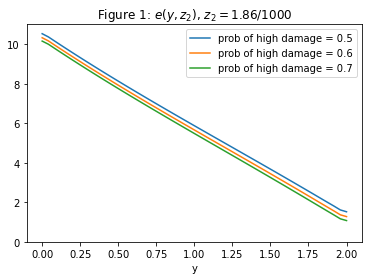

In [46]:
plt.plot(y_grid, e_grid_5[25], label='prob of high damage = 0.5')
plt.plot(y_grid, e_grid_6[25], label='prob of high damage = 0.6')
plt.plot(y_grid, e_grid_7[25], label='prob of high damage = 0.7')
plt.xlabel('y')
plt.legend()
plt.title(r'Figure 1: $e(y, z_2)$, $z_2=1.86/1000$')
plt.ylim(0, None)
plt.savefig('fig_1.pdf')

In [29]:
@njit
def simulation(y_grid, z_grid, e_grid, yoz_start=290, z_loc=25, T=100):
    Et = np.zeros(T+1)
    z = z_grid[z_loc]
    for i in range(T+1):
        Et[i] = np.interp(yoz_start*z, y_grid, e_grid[z_loc])
        yoz_start = yoz_start + Et[i]
        if yoz_start*z > 2:
            print('Warning')
    return Et


@njit(parallel=True)
def simulate_capital(α_k, β_k, σ_k, β_z, σ_z, ioverk, κ, Ws, k_start, N=100_000, T=100, dt=1.):
    var_z = dt*σ_z@σ_z/(1-(1-β_z*dt)**2)
    std_z = np.sqrt(var_z)

    time_periods = int(T/dt)
    z_path = np.zeros((N, time_periods+1))
    k_path = np.zeros((N, time_periods+1))
    for i in range(N):
        z0 = np.random.normal(0.,std_z)
        k0 = k_start
        z_path[i, 0] = z0
        k_path[i, 0] = k0
        for j in range(1, time_periods+1):
            k1 = k0 + (α_k + β_k*z0 + ioverk - κ/2.*ioverk**2 - σ_k@σ_k/2.)*dt + σ_k@Ws[i, j]*np.sqrt(dt)
            z1 = (1.-β_z*dt)*z0 + σ_z@Ws[i, j]*np.sqrt(dt)
            k_path[i, j] = k1
            z_path[i, j] = z1
            k0 = k1
            z0 = z1
    return k_path

In [30]:
T = 100
# Et = simulation(y_grid, z_grid, e_grid, yoz_start=290, z_loc=25, T=T)
Et_5 = simulation(y_grid, z_grid, e_grid_5, yoz_start=290, z_loc=25, T=T)
Et_6 = simulation(y_grid, z_grid, e_grid_6, yoz_start=290, z_loc=25, T=T)
Et_7 = simulation(y_grid, z_grid, e_grid_7, yoz_start=290, z_loc=25, T=T)

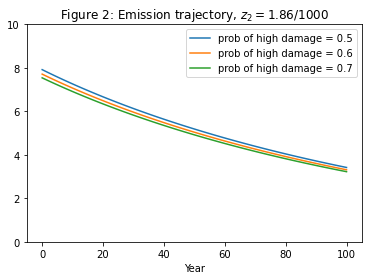

In [48]:
plt.figure()
plt.title(r'Figure 2: Emission trajectory, $z_2=1.86/1000$')
plt.plot(Et_5, label='prob of high damage = 0.5')
plt.plot(Et_6, label='prob of high damage = 0.6')
plt.plot(Et_7, label='prob of high damage = 0.7')
plt.legend()
plt.ylim(0, 10)
plt.xlabel('Year')
plt.savefig('fig_2.pdf')

## SCC computation

$$
SCC = ME(y, z_2) \frac{(\alpha-i^*)\exp(k-n)}{\delta(1-\eta)}
$$

In our uncertainty decompositions, we compute $ME$ in the following four steps:

i) compute
$$
ME_1(y, z_2) = (1-\eta)\left(\sum_{j=1}^J\pi_jz_2\frac{d}{d \tau}\Lambda_j (y)\right)
$$

ii) construct
$$
U(y, z_2) = (1-\eta) \left[\sum_{j=1}^J\pi_jz_2^2 \frac{d^2}{d\tau^2}\Lambda_j (y) e^*(y, z_2)\right]
$$

iii) solve
$$
0 = -\delta f + \frac{\partial f}{\partial y}e^* + \frac{\partial f}{\partial z_2}\left[-\rho(z_2 - \sum_{j}^J \pi_j\mu_{2,j})\right] + \left[\frac{\partial^2 f}{\partial (z_2)^2}(y, z_2)\right]\left(\frac{z_2|\sigma_2|^2}{2}\right)
$$

iv) then $ME_2(y, z_2)=f(y, z_2)$, and $ME(y, z_2) = ME_1(y, z_2) + ME_2(y, z_2)$